<a href="https://colab.research.google.com/github/ksm999/QuantumComputing/blob/main/QIP_FRQI_%26_NEQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Image Processing (QIP)

### Package Install

In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.9 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136818 sha256=00afb7a5e695ba4cd619a7c7fe9e7302263ca6ff462962a83899d9438ccbdbf9
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 26.5 MB/s eta 0:00:00


## Flexible Representation of Quantum Images (FRQI)

### Implementation and Measurement : 2*2 Image Greyscale Values

In [ ]:
# Importing standard Qiskit libraries and configuring account
import qiskit
from qiskit import QuantumCircuit, BasicAer, IBMQ, Aer
from qiskit import transpile, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from math import pi

|𝐼(ϴ)> = 1/2^n Σ(cosϴ|0>+sinϴ|1>)⊗|i>

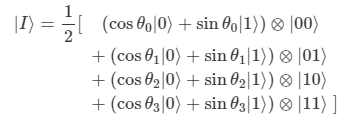

#### Example 1. 𝛩_i = 0; ∀i - all pixels at minimum intensity

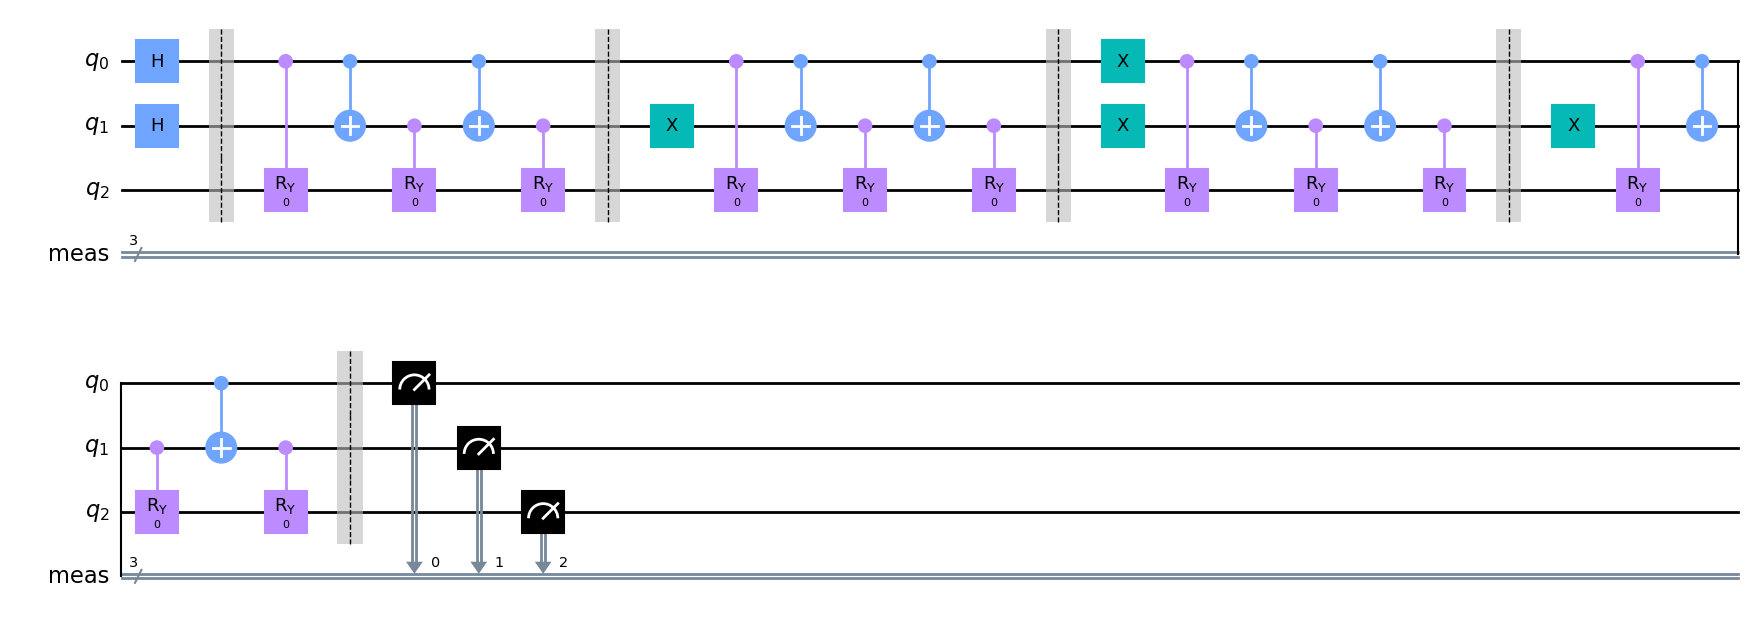

In [ ]:
theta = 0 # all pixels are black
qc = QuantumCircuit(3)

qc.h(range(0,2))
qc.barrier()

# Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

# Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

# Pixel 3

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

# Pixel 4

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw('mpl')

#### Measurement and Image Retrieval

We can see that all the terms associated with the state |1> in the color encoding part of the FRQI state will vanish because of the value 𝛩 so we do expect to see only 4 equiprobable states.

{'011': 1044, '010': 992, '000': 1052, '001': 1008}


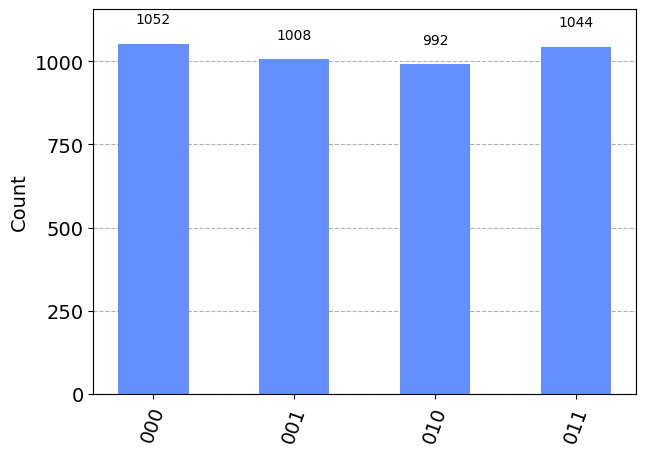

In [ ]:
backend = Aer.get_backend('aer_simulator')
job = execute(qc, backend, shots=4096)
result = job.result()
counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)


#### Example 2. 𝜃_i = π/2;, ∀i - all pixels at maximum intensity

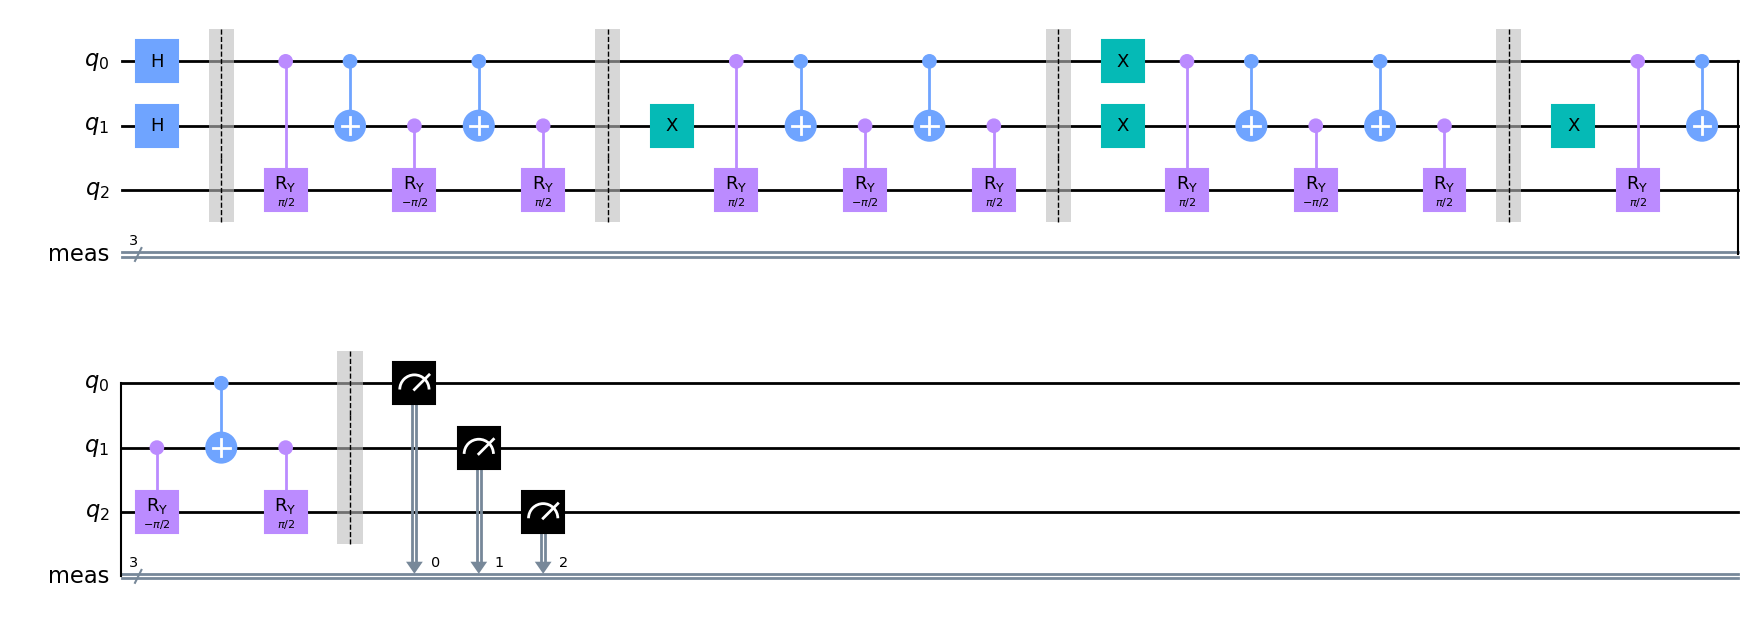

In [ ]:
theta = pi/2  # all pixels white
qc1 = QuantumCircuit(3)

qc1.h(0)
qc1.h(1)

qc1.barrier()

#Pixel 1

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

#Pixel 2

qc1.x(1)

qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.barrier()

#Pixel 3

qc1.x(1)
qc1.x(0)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)


qc1.barrier()

#Pixel 4

qc1.x(1)
qc1.cry(theta,0,2)
qc1.cx(0,1)
qc1.cry(-theta,1,2)
qc1.cx(0,1)
qc1.cry(theta,1,2)

qc1.measure_all()

qc1.draw('mpl')

#### Measurement and Image Retrieval

In this case we do expect to see the terms associated with the cos in the equation (1.3) to vanish, and get 4 equiprobable states with a "1" prefix.

{'110': 986, '111': 1013, '100': 1080, '101': 1017}


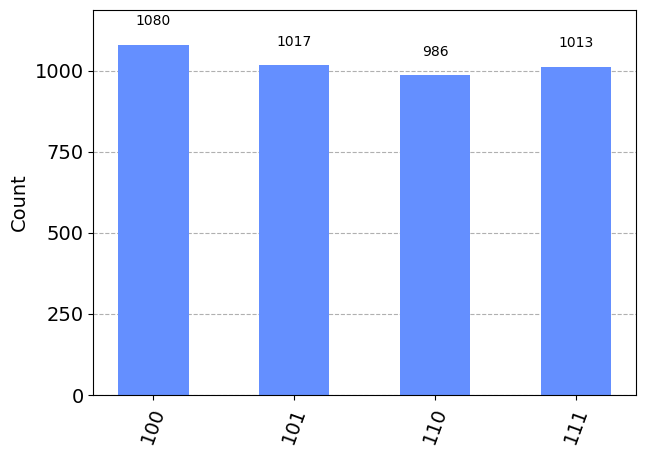

In [ ]:
backend = Aer.get_backend('aer_simulator')
job = execute(qc1, backend, shots=4096)
result = job.result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

#### Example 3: 𝜃_i = π/4;,;∀i - all pixels at 50 intensity

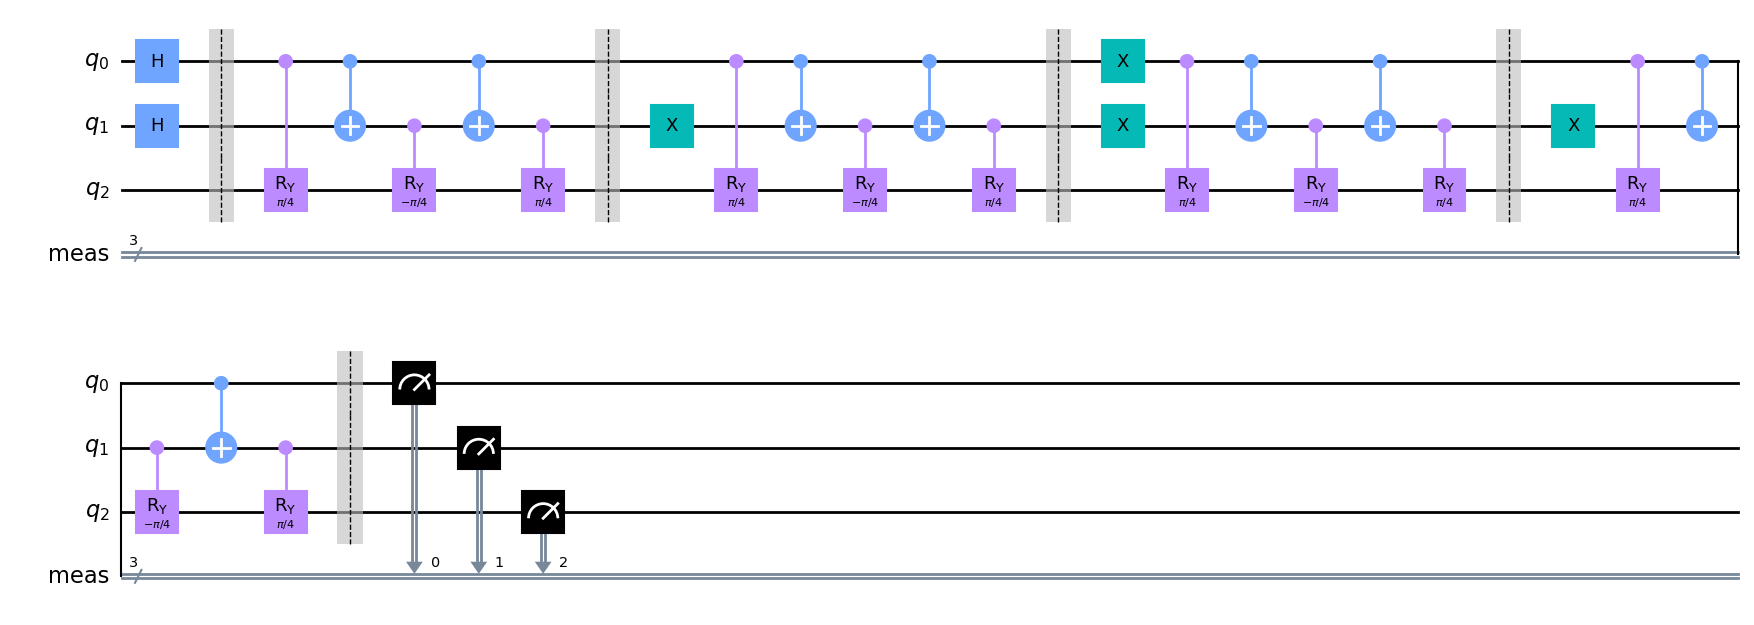

In [ ]:
theta = pi/4  # all pixels white
qc2 = QuantumCircuit(3)

qc2.h(0)
qc2.h(1)

qc2.barrier()

# Pixel 1

qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

# Pixel 2

qc2.x(1)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

# Pixel 3

qc2.x(1)
qc2.x(0)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.barrier()

# Pixel 4

qc2.x(1)
qc2.cry(theta,0,2)
qc2.cx(0,1)
qc2.cry(-theta,1,2)
qc2.cx(0,1)
qc2.cry(theta,1,2)

qc2.measure_all()

qc2.draw('mpl')

#### Measurement and Image Retrieval
In this case we do expect to get all the 8 equiprobable states.

{'001': 484, '100': 506, '101': 512, '000': 511, '010': 527, '110': 501, '011': 520, '111': 535}


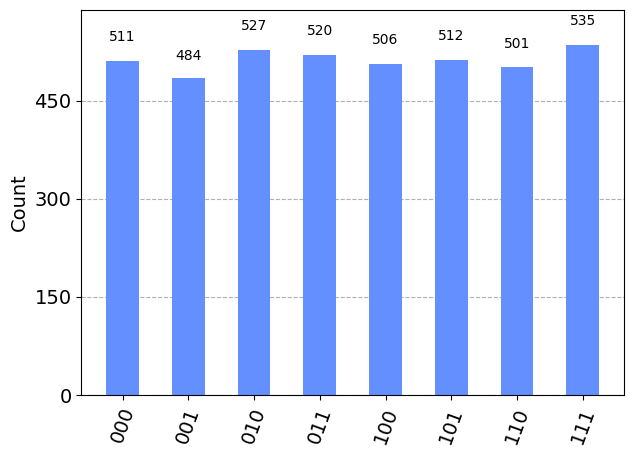

In [ ]:
backend = Aer.get_backend('aer_simulator')
job = execute(qc2, backend, shots=4096)
result = job.result()
counts = result.get_counts(qc2)
print(counts)
plot_histogram(counts)

#### Circuit Analysis and Running on a Real Device

As the only difference between the circuits is teh rotation angle 𝜃, we can check the depth, and number of gates needed for this class of circuits (i.e., 2*2 images)

#### Circuit Analysis
Let's use our circuit with 𝜃 = π/2;,;∀i as example (maximum intensity for all pixels.)

In [ ]:
print("Depth:", qc1.depth)
print("Operations:", qc1.count_ops())

Depth: <bound method QuantumCircuit.depth of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x785ea750f070>>
Operations: OrderedDict([('cry', 12), ('cx', 8), ('barrier', 5), ('x', 4), ('measure', 3), ('h', 2)])


This does not look too complex but if we want to see how this circuit can be unrolled by the transpiler, it gets a bit more complicated.

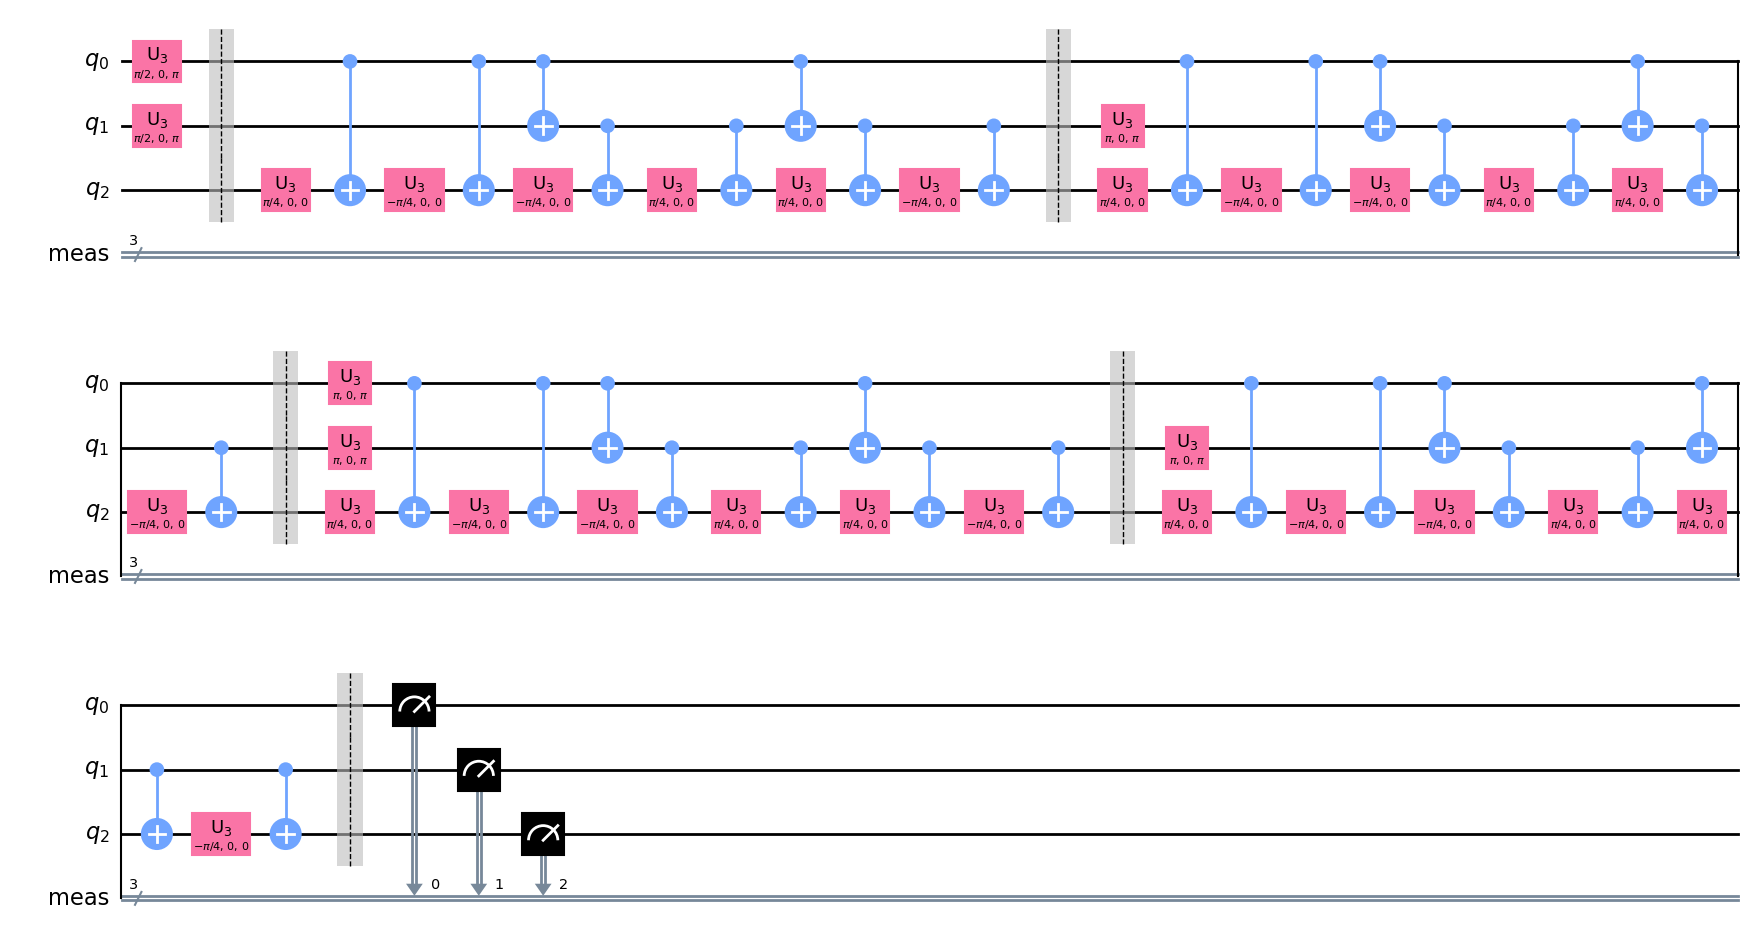

In [ ]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3','cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc1)
new_circ.draw('mpl')

In [ ]:
print("Depth:", new_circ.depth)
print("Operations:", new_circ.count_ops())

Depth: <bound method QuantumCircuit.depth of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x785ea72410c0>>
Operations: OrderedDict([('cx', 32), ('u3', 30), ('barrier', 5), ('measure', 3)])


The depth for example doubled in size.
We can get closer to what would actually be run on a real device by feeding the transpiler with a device coupling map (for instance, Athens).
We will also use optimization level 3.


In [ ]:
from qiskit.providers.fake_provider import FakeAthens
fake_athens = FakeAthens()
# The device coupling map is needed for transpiling to correct
# CNOT gates before simulation
coupling_map = fake_athens.configuration().coupling_map
optimized_3 = transpile(qc1, backend=fake_athens, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('rz', 59), ('sx', 55), ('cx', 51), ('barrier', 5), ('x', 4), ('measure', 3)])
depth =  147


#### Run on a Real Device
We are now ready to run on a real device. Here we will use a simulated (fake) Athens device, but you can run this on the real device too.


In [ ]:
# This code connects to, or relies on results from IBM Quantum,
# Add your API-token to your account to run this cell

from qiskit import assemble

t_qc1 = transpile(qc1, fake_athens, optimization_level=3)
qobj = assemble(t_qc1, shots=4096)
result = fake_athens.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)


As we can see the result are not really what we were expecting due to the noise of the device. The ideal simulated circuit is shown below for contrast.

<ipython-input-66-bef5a74b5a07>:3: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = aer_sim.run(qobj).result()


{'101': 999, '110': 1016, '111': 1059, '100': 1022}


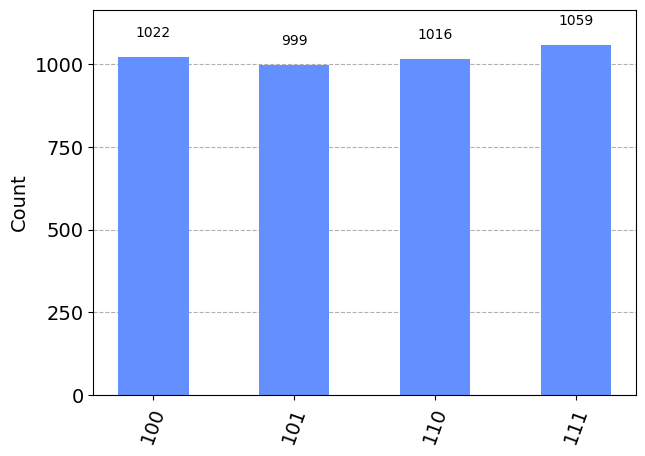

In [ ]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(t_qc1, shots=4096)
result = aer_sim.run(qobj).result()
counts = result.get_counts(qc1)
print(counts)
plot_histogram(counts)

### Compression

As the images we would like to encode are growing in size and given the depth of the circuits we will have to run, it is quite obvious that whatever we can do in order to reduce the complexity of the circuit (depth and number of CNOT gates) will make a great difference.

Compression can be achieved by grouping pixels with the same intensity. What makes them distinct is the binary string used to encode the position, but they share the same angle for the associated controlled rotation. Let's consider for example the following image:

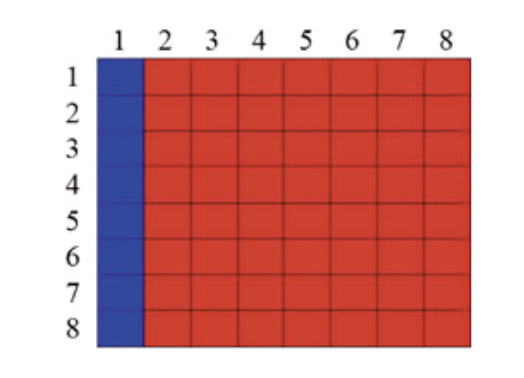

The blue pixels are at positions are
|0>,|8>,|16>,|24>,|32>,|40>,|48> and |56>.
Their respective binary representation and boolean expressions are:

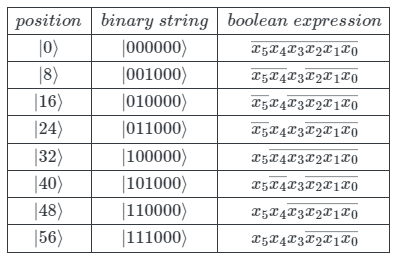

The boolean expression we would liek to simplify/minimize is then:


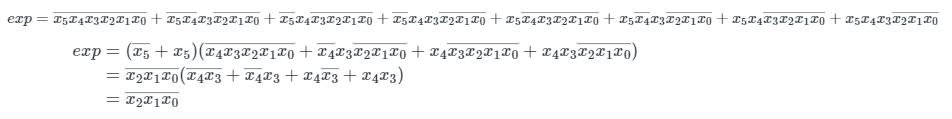

We can then not only group the pixels under one conditional rotation, but we also see that the conditions for the controlled gate also have been reduced, which will result in a reduction of single gates needed for implementation.

## Novel Enhanced Quantum Representation (NEQR) for Digital Images

The Novel Enhanced Quantum Representation (NEQR) is another one of the earlier forms of quantum image representation.

It's similar to its predecessor the Flexible Representation of Quantum Images (FRQI) in that it uses a normalized superposition to store pixels in an image. The limitation of FRQI is that it uses one qubit to store the grayscale information of the pixel, which prevents performing any complex image transformations.

NEQR was created to improve over FRQI by leveraging the basis state of a qubit sequence to store the image's grayscale value [5].

NEQR offers the following advantages over FRQI as demonstrated in [5]:

*   Quadratic speedup of the time complexity to prepare the NEQR quantum image

*  Optimal image compression ratio of up to 1.5*

*   Accurate image retrieval after measurement, as opposed to probabilistic as FRQI
*   Complex color and many other operations can be achieved

In this section we will represent a classical 2*2 grayscaled image in a quantum computer using the NEQR model.

### The NEQR Process

The NEQR process to represent an image is composed of two parts; preparation and compression and are described as follows.

#### How are images encoded today:

In order to represent an image on a quantum computer using the NEQR model, we'll first look at the various components required to do so and how they are related to each other. We'll begin with the color range of the image.

The color range of an image is represented by a bitstring as follows: Binary Image: 1 bit representing 0=black, and 1=white


Grayscale Image: 8 bits representing the various shades of gray intensity values between 0 (black) and 255 (white).


Color Image: 24 bits, are broken up into 3 groups of 8 bits, where each group of 8 bits represents the Red, Green, and Blue intensities of the pixel color.


In our example we will represent the pixels by their position in the image. Since we will be representing a two-dimensional image, we will define the position of the image by its row and column, Y, X, respectively.

Note In image processing the pixel positions are represented as they would on the X-Y plane, which is why the column numbers are represented by the value X, and the row numbers are represented by the value Y.

#### Image Compression:

When the quantum representation of the image is completed, we will check the depth and size of the circuit created and provide some classical options to compress the generated NEQR circuit.

Now, let's get started by encoding a 2*2 quantum image as follows.

### Encoding a 2*2 Image

In this example we will encode a 2*2 grayscale image where each pixel value will contain the following values.
In the table below we have the first column which represents the pixel position of the 2*2 image. The second column represents the intensity value at the specified pixel position. The third column is a description of the grayscale intensity (ex: 01100100 = 100).